In [1]:
##Ridge regression 

import os
import matplotlib.pyplot as plt
import numpy as np
import scripts.implementations as lib  # Add personal library
import scripts.proj1_helpers as helper  # Add personal library

%matplotlib inline
%load_ext autoreload
%autoreload 2
np.set_printoptions(precision=4)

DATA_FOLDER = 'data'
DATA_TRAIN = os.path.join(DATA_FOLDER, 'train.csv')
DATA_TEST = os.path.join(DATA_FOLDER, 'test.csv')

y, x, ids, header = helper.load_csv_data(DATA_TRAIN)
y_train, x_train,  y_validation, x_validation = lib.sep_valid_train_data(x,y,0.2);

In [2]:
x_train[x_train == -999] = np.nan

In [3]:
for i, feature in enumerate(x_train.T):
    print('Feature {} - {} has range: [{:.4f}, {:.4f}]'.format(
        i+1, header[i], np.nanmin(feature), np.nanmax(feature)))

Feature 1 - DER_mass_MMC has range: [9.0440, 988.1990]
Feature 2 - DER_mass_transverse_met_lep has range: [0.0000, 690.0750]
Feature 3 - DER_mass_vis has range: [6.3290, 1329.9130]
Feature 4 - DER_pt_h has range: [0.0000, 2834.9990]
Feature 5 - DER_deltaeta_jet_jet has range: [0.0000, 8.5030]
Feature 6 - DER_mass_jet_jet has range: [13.6020, 4974.9790]
Feature 7 - DER_prodeta_jet_jet has range: [-18.0660, 16.6900]
Feature 8 - DER_deltar_tau_lep has range: [0.2280, 5.6840]
Feature 9 - DER_pt_tot has range: [0.0000, 2834.9990]
Feature 10 - DER_sum_pt has range: [46.1040, 1852.4620]
Feature 11 - DER_pt_ratio_lep_tau has range: [0.0470, 19.7730]
Feature 12 - DER_met_phi_centrality has range: [-1.4140, 1.4140]
Feature 13 - DER_lep_eta_centrality has range: [0.0000, 1.0000]
Feature 14 - PRI_tau_pt has range: [20.0000, 622.8620]
Feature 15 - PRI_tau_eta has range: [-2.4990, 2.4970]
Feature 16 - PRI_tau_phi has range: [-3.1420, 3.1420]
Feature 17 - PRI_lep_pt has range: [26.0010, 461.8960]
Fea

In [16]:
# Remove features with NaN
keep_id = np.nonzero(np.sum(np.isnan(x_train), axis=0) == 0)[0]
x_naive = x_train[:, keep_id]
# normalize features
x_naive = (x_naive - np.mean(x_naive, axis=0))/np.std(x_naive, axis=0)

keep_id_val = np.nonzero(np.sum(np.isnan(x_validation), axis=0) == 0)[0]
x_naive_val = x_validation[:, keep_id]
# normalize features
x_naive_val = (x_naive_val - np.mean(x_naive_val, axis=0))/np.std(x_naive_val, axis=0)

np.sum(np.isnan(x_naive_val))

0

In [5]:
from scripts.ml import cross_validation_ls

degrees = np.linspace(1, 6, 6).astype(int)
for i, degree in enumerate(degrees):
    acc, _, _ = cross_validation_ls(y_train, x_naive, degree=degree)
    print('{}/{} Least square deg {} with acc {:.4f}'.format(i+1, len(degrees), degree, acc))

1/6 Least square deg 1 with acc 0.7331
2/6 Least square deg 2 with acc 0.7547
3/6 Least square deg 3 with acc 0.7619
4/6 Least square deg 4 with acc 0.7029
5/6 Least square deg 5 with acc 0.6866
6/6 Least square deg 6 with acc 0.7499


degree=1, lambda=0.000, Training RMSE=0.840, Testing RMSE=0.840
train acc :  0.73302
validation acc :  0.7347
degree=1, lambda=0.000, Training RMSE=0.840, Testing RMSE=0.840
train acc :  0.73302
validation acc :  0.7349
degree=1, lambda=0.000, Training RMSE=0.840, Testing RMSE=0.840
train acc :  0.73302
validation acc :  0.73496
degree=1, lambda=0.000, Training RMSE=0.840, Testing RMSE=0.840
train acc :  0.733025
validation acc :  0.73496
degree=1, lambda=0.000, Training RMSE=0.840, Testing RMSE=0.840
train acc :  0.733045
validation acc :  0.73496
degree=1, lambda=0.000, Training RMSE=0.840, Testing RMSE=0.840
train acc :  0.733095
validation acc :  0.7349
degree=1, lambda=0.000, Training RMSE=0.840, Testing RMSE=0.840
train acc :  0.733015
validation acc :  0.73494
degree=1, lambda=0.000, Training RMSE=0.841, Testing RMSE=0.841
train acc :  0.7325
validation acc :  0.73332
degree=1, lambda=0.001, Training RMSE=0.857, Testing RMSE=0.857
train acc :  0.72309
validation acc :  0.7251
de

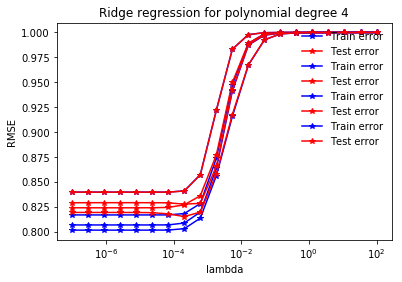

In [26]:
 def plot_train_test(train_errors, test_errors, lambdas, degree):
    """
    train_errors, test_errors and lambas should be list (of the same size) the respective train error and test error for a given lambda,
    * lambda[0] = 1
    * train_errors[0] = RMSE of a ridge regression on the train set
    * test_errors[0] = RMSE of the parameter found by ridge regression applied on the test set
    
    degree is just used for the title of the plot.
    """
    plt.semilogx(lambdas, train_errors, color='b', marker='*', label="Train error")
    plt.semilogx(lambdas, test_errors, color='r', marker='*', label="Test error")
    plt.xlabel("lambda")
    plt.ylabel("RMSE")
    plt.title("Ridge regression for polynomial degree " + str(degree))
    leg = plt.legend(loc=1, shadow=True)
    leg.draw_frame(False)
    plt.savefig("ridge_regression")
    
best_acc = 0
best_degree = 0
best_lambda = 0
for degree in range(1,5):
    
    lambdas = np.logspace(-7, 2, 20)
    
    # Split sets
    #x_train, x_test, y_train, y_test = split_data(x, y, ratio, seed)
    
    # Get ploynomial
    phi_train = lib.build_poly(x_naive, degree)
    phi_test = lib.build_poly(x_naive_val, degree)

    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        
        mse_tr, weights = lib.ridge_regression(y_train, phi_train, lambda_)
        mse_te = lib.compute_loss(y_validation, phi_test.dot(weights))
        rmse_tr.append(np.sqrt(2*mse_tr))
        rmse_te.append(np.sqrt(2*mse_te))
    
        print("degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
                d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        print('train acc : ', lib.accuracy(y_train, phi_train.dot(weights)))
        val_acc = lib.accuracy(y_validation, phi_test.dot(weights))
        print('validation acc : ', val_acc)

        if(val_acc > best_acc):
            best_acc = val_acc
            best_degree = degree
            best_lambda = lambda_
            
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)

print('Best params for Ridge regression : degree = ',best_degree, ', lambda = ',best_lambda,', accuracy = ', best_acc)